### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os
from PIL import Image

%matplotlib inline

### Loading Articles Dataset

In [2]:
articles = pd.read_csv('articles.csv')
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


### Loading Customers Dataset

In [3]:
customers = pd.read_csv('customers.csv')
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


### Loading Transactions Dataset

In [4]:
transactions = pd.read_csv('transactions_train.csv', parse_dates=['t_dat'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


### Loading Images

In [5]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in (os.walk('C:/Users/baind/Dissertation/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

In [6]:
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

In [7]:
image_article_df = articles[["article_id", "product_code", "product_group_name", 
"product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
0,108775015,108775,Garment Upper body,Vest top,0108775015
1,108775044,108775,Garment Upper body,Vest top,0108775044
2,108775051,108775,Garment Upper body,Vest top,0108775051
3,110065001,110065,Underwear,Bra,0110065001
4,110065002,110065,Underwear,Bra,0110065002


### Non-personalised function

In [5]:
from datetime import timedelta

def non_personalised(k, n, data):
    transactions = data.copy()
    df = transactions[transactions.t_dat > transactions.t_dat.max()-timedelta(days=n)]
    df = df.groupby('article_id')['t_dat'].count().reset_index()
    df.columns = ['article_id', 'no_of_times_sold']
    df = df.sort_values('no_of_times_sold', ascending = False)
    df_topk = df[:k].reset_index(drop = True)
    
    return df_topk

### Displaying Images

In [9]:
def show_images(df_topk):
    df_topk_img = df_topk.join(image_article_df[['article_id', 'product_type_name', 'image_name']].set_index(
            'article_id'), on='article_id', how='left')

    for i in df_topk_img['image_name']:
        fig, ax = plt.subplots(1, 1, figsize=(20,6))
        img = Image.open('images/'+str(i)[:3]+'/'+str(i)+'.jpg')
        plt.axis('off')
        plt.title(str(i)+' - '+ df_topk_img.loc[df_topk_img.image_name == i, 'product_type_name'].values[0])
        plt.imshow(img)

### Splitting Data into Training and Testing data

In [6]:
from datetime import timedelta

def split_train_test(n, data):
    trans = data.copy()
    transactions_ndays = data[data.t_dat > data.t_dat.max()-timedelta(days=n)]
    test_data = transactions_ndays
    trans.drop(trans.tail(len(transactions_ndays)).index, inplace = True)
    train_data = trans
    return train_data, test_data

#### Removing new customers from test data

In [7]:
def remove_new_customers(data1, data2):
    cust_list1 = list(data1['customer_id'].unique())
    cust_list2 = list(data2['customer_id'].unique())
    for customer in cust_list1:
        if customer not in cust_list2:
            data1 = data1.drop(labels=data1[data1['customer_id'] == customer].index)
    return data1

#### Downsizing the test data

In [8]:
import random

random.seed(42)

def downsize(data, n):
    unique_cust_ids = list(data['customer_id'].unique())
    sample_cust_ids = random.sample(unique_cust_ids, n)
    downsized_data = data[data['customer_id'].isin(sample_cust_ids)]
    return downsized_data

In [9]:
train, test = split_train_test(7, transactions)

In [13]:
train

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31548008,2020-09-15,ffe41634ff990908faacbb465063e027e7c39499f8dfc1...,850917001,0.025407,1
31548009,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,853316001,0.008458,1
31548010,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,296366006,0.000847,1
31548011,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,789769001,0.013542,1


In [9]:
test

,t_dat,customer_id,article_id,price,sales_channel_id
31548013,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,786022008,0.048441,2
31548014,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,913272003,0.032288,2
31548015,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,889669006,0.056508,2
31548016,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,237347060,0.033881,1
31548017,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,562245001,0.013542,1
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [10]:
new_test_data = downsize(test, 1000)

In [11]:
new_test_data

,t_dat,customer_id,article_id,price,sales_channel_id
31548155,2020-09-16,012b7cc3c5080e46dac622a12e99d23510a4d67a4037d1...,923340001,0.016932,1
31548156,2020-09-16,012b7cc3c5080e46dac622a12e99d23510a4d67a4037d1...,923340001,0.016932,1
31548218,2020-09-16,01bd99ffb52a7ede83ef062e65b3959f7317a4fd225506...,664074001,0.010153,1
31548450,2020-09-16,03d708693a2dec4cc72d12e568383c356a0ad201d651f7...,803757005,0.016932,2
31548451,2020-09-16,03d708693a2dec4cc72d12e568383c356a0ad201d651f7...,904567001,0.025407,2
...,...,...,...,...,...
31787493,2020-09-22,f8dea2bb1152f6ea01635f130f914454d5ddfa5bfda99e...,685813037,0.016932,2
31787494,2020-09-22,f8dea2bb1152f6ea01635f130f914454d5ddfa5bfda99e...,922625003,0.025407,2
31787882,2020-09-22,fc453ef5d7f22f05ff890b39b018d353b3464c42fc8167...,865929007,0.016932,2
31787883,2020-09-22,fc453ef5d7f22f05ff890b39b018d353b3464c42fc8167...,574109042,0.025407,2


In [12]:
len(new_test_data['customer_id'].unique())

1000

In [13]:
test_data_without_new_cust = remove_new_customers(test, train)

In [14]:
test_data_without_new_cust

,t_dat,customer_id,article_id,price,sales_channel_id
31548013,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,786022008,0.048441,2
31548014,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,913272003,0.032288,2
31548015,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,889669006,0.056508,2
31548016,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,237347060,0.033881,1
31548017,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,562245001,0.013542,1
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [15]:
new_test_data_without_new_cust = downsize(test_data_without_new_cust, 1000)

In [16]:
new_test_data_without_new_cust

,t_dat,customer_id,article_id,price,sales_channel_id
31548335,2020-09-16,02f1f3fb12a7625ab43b3ac2d33a6d5ffe41f5a884db5b...,309864016,0.013542,2
31548336,2020-09-16,02f1f3fb12a7625ab43b3ac2d33a6d5ffe41f5a884db5b...,309864013,0.013542,2
31548583,2020-09-16,056ad546370ce46645d712404fbd5b75d672099aa9e5ab...,905518001,0.015237,1
31548584,2020-09-16,056ad546370ce46645d712404fbd5b75d672099aa9e5ab...,905518001,0.015237,1
31548585,2020-09-16,056ad546370ce46645d712404fbd5b75d672099aa9e5ab...,905518001,0.015237,1
...,...,...,...,...,...
31787958,2020-09-22,fce13d13c76cef6fde2e0609c91ac11f2787ab9b0d1387...,777892001,0.033881,2
31787959,2020-09-22,fce13d13c76cef6fde2e0609c91ac11f2787ab9b0d1387...,673396002,0.013542,2
31787960,2020-09-22,fce13d13c76cef6fde2e0609c91ac11f2787ab9b0d1387...,674052015,0.033881,2
31787961,2020-09-22,fce13d13c76cef6fde2e0609c91ac11f2787ab9b0d1387...,674606068,0.033881,2


### Converting test data into dictionary of customers and articles

In [17]:
test_df = new_test_data.copy()
test_df['article_id'] = test_df['article_id'].astype(str) + ' '
test_df = pd.DataFrame(test_df.groupby('customer_id').article_id.sum())

In [18]:
test_df = test_df.reset_index()

In [19]:
test_df

,customer_id,article_id
0,00d50aaf75f46e2975bd23a9283d098b34a087e9281255...,754362020 572998013
1,00e80d504a6043b8b588f118b9bf97d73daeed6d3f68b1...,785018003 821152002
2,00f0157f63bfd27503a760c86b610d9e3ea63e67351aa0...,456163086 715624001 456163085
3,00fb1d75af5bdbea71936c004adaef008c5dd8820c8353...,909371001 877961005 877961006 807244017
4,012b7cc3c5080e46dac622a12e99d23510a4d67a4037d1...,923340001 923340001
...,...,...
995,fe8f97e64a752766fff7d9517e70c09d0e32a8a029ea5b...,935840001
996,fe9399f3273bc90d2f571b6a2e7f3b0f8876736a93c550...,874826001 738713029 783346016 865917002 716670...
997,ffa4cff2802e80ea99a47655ae784c93560f72ca16b6ac...,873679001
998,ffa5a7175bc5200c22de5080edc254c81729114e200dd4...,570003001


In [20]:
test_df_without_new_cust = new_test_data_without_new_cust.copy()
test_df_without_new_cust['article_id'] = test_df_without_new_cust['article_id'].astype(str) + ' '
test_df_without_new_cust = pd.DataFrame(test_df_without_new_cust.groupby('customer_id').article_id.sum()).reset_index()

In [21]:
test_df_without_new_cust

,customer_id,article_id
0,0117bbca975fd76ffd2cb29c0c909254ffb7a5ad2ef77c...,881942001 573085052
1,011e7eae7008ea3d2360327ffc755716c146ee709c2626...,934312001 456163060 730683054 754238024 902802...
2,01763b89f4db88313e4a0833d654845fc39354f640ec4b...,911981001 882902001 892896001
3,01c832ff34c16a019eea2fde43ce7d6fd3c024c7a0a22b...,685814003
4,027854a88735e35c3e76a899213d3c957c5a321efd1f3e...,751471043
...,...,...
995,fdba75a5a8ba5aa98de911954a40871f1a2cef5796bc40...,907696004 853881001
996,fef82b675eb50f721d08aa6ee91ca153333880d0dce916...,372860001 873678003 908584001 673677004 372860...
997,ff05ae6e56395fe81a69192c23f054ffda5e69c1ec28b5...,837249002 719957017
998,ff373f594a21de2c41d12907014cea09e7fe3ccf485d1f...,664074007 849886001


### Creating content-based function

In [22]:
train_df = train.copy()
train_df['article_id'] = train_df['article_id'].astype(str) + ' '
train_df = pd.DataFrame(train_df.groupby('customer_id').article_id.sum())

In [23]:
train_df = train_df.reset_index()

In [24]:
articles_product_code_df = articles.copy()
articles_product_code_df['article_id'] = articles_product_code_df['article_id'].astype(str) + ' '
articles_product_code_df = pd.DataFrame(articles_product_code_df.groupby(
    'product_code').article_id.sum()).reset_index()

In [25]:
articles_product_type_df = articles.copy()
articles_product_type_df['article_id'] = articles_product_type_df['article_id'].astype(str) + ' '
articles_product_type_df = pd.DataFrame(articles_product_type_df.groupby(
    'product_type_no').article_id.sum()).reset_index()

In [26]:
def content_based(n, k, data, articles_product_code_df, articles_product_type_df):
    recommendations = {}
    for cust in data:
        if (cust in list(train_df['customer_id'])):
            article_ids = train_df[train_df['customer_id']==cust]['article_id'].array[0][:-1].split(' ')
            
            if len(article_ids) >= n:
                article_ids = article_ids[:n]
            
            no_recs_each_item = k//len(article_ids)
            no_extra_rec = k%len(article_ids)
            rec_articles = []
            for a in article_ids:
                p_code = articles[articles['article_id']==int(a)]['product_code'].array[0]
                p_type = articles[articles['article_id']==int(a)]['product_type_no'].array[0]
        
                rec_article_ids = articles_product_code_df[articles_product_code_df['product_code']==p_code]['article_id'].array[0][:-1].split(' ')
            
                rec_article_ids.remove(str(a))
                if(len(rec_article_ids) < no_recs_each_item):
                    more_rec_article_ids = articles_product_type_df[articles_product_type_df['product_type_no']==p_type]['article_id'].array[0][:-1].split(' ')
                
                    for i in more_rec_article_ids:
                        if i not in rec_article_ids:
                            rec_article_ids.append(i)
                    rec_article_ids.remove(str(a))
                rec_list = rec_article_ids[:no_recs_each_item]
                
                if(no_extra_rec !=0):
                    rec_list = rec_article_ids[no_recs_each_item:no_extra_rec]

                rec_articles.extend(rec_list)
            if(len(rec_articles) < k):
                sub = k-len((rec_articles))
                for i in range(sub):
                    rec_articles.append(0)

            recommendations[cust]=rec_articles
        else:
            recommendations[cust]=[0]*k
    
    return recommendations

### User-Item Matrix

In [27]:
trans_df = transactions.copy()

In [28]:
ALL_USERS = trans_df['customer_id'].unique().tolist()
ALL_ITEMS = trans_df['article_id'].unique().tolist()
user_ids = dict(list(enumerate(ALL_USERS)))
item_ids = dict(list(enumerate(ALL_ITEMS)))
user_map = {u: uidx for uidx, u in user_ids.items()}
item_map = {i: iidx for iidx, i in item_ids.items()}
trans_df['user_id'] = trans_df['customer_id'].map(user_map)
trans_df['item_id'] = trans_df['article_id'].map(item_map)

In [29]:
train, test = split_train_test(7, trans_df)

In [30]:
user_item_df = train.groupby(['user_id', 'item_id'])['t_dat'].count().reset_index()
user_item_df = user_item_df.rename(columns = {'t_dat': 'purchase_count'})

In [31]:
values = user_item_df.purchase_count.values
row = user_item_df.user_id.values
column = user_item_df.item_id.values

In [32]:
#importing sparse matrix module
from scipy.sparse import csr_matrix

In [33]:
sparse_user_item_matrix = csr_matrix((values, (row, column)), shape=(len(ALL_USERS), len(ALL_ITEMS)))

### Using ALS from Implicit Library

In [34]:
from implicit.als import AlternatingLeastSquares

In [35]:
model = AlternatingLeastSquares(factors=40, iterations=10, random_state=42)
model.fit(sparse_user_item_matrix)

c:\Users\baind\anaconda3\lib\site-packages\implicit\utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(
100%|██████████| 10/10 [01:53<00:00, 11.37s/it]


### Defining ALS Recommendation function

In [36]:
def als_recommend(n: int, cust_id_list: list, data: pd.DataFrame, sparse_matrix: object)->list:
    '''
    Uses ALS to generate recommendations for customers
    ---------------
    parameters:
        n: number of recommended items
        data: list of customer_ids
    '''
    recommendations = []
    for cust in cust_id_list:
        user_id = data[data['customer_id']==cust]['user_id'].array[0]
        item_ids = model.recommend(userid=user_id, N=n, user_items=sparse_matrix[user_id])[0]
        article_ids = []
        for item in item_ids:
            article_id = data[data['item_id']==item]['article_id'].array[0]
            article_ids.append(article_id)
        recommendations.append(article_ids)
    return recommendations

### Defining MAP

In [100]:
def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)


def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

### Defining Average Precision

In [38]:
def avg_precision(actual, predicted):
    precision=0
    for act,pred in zip(actual, predicted):
        sum = 0
        for p in pred:
            if p in act:
                sum+=1.0
        precision+=(sum/len(pred))
        
    return precision/len(actual)

### Defining Average Recall

In [39]:
def avg_recall(actual, predicted):
    recall=0
    for act,pred in zip(actual, predicted):
        sum = 0
        for p in pred:
            if p in act:
                sum+=1.0
        recall+=(sum/len(act))
        
    return recall/len(actual)

#### Evaluating Non-Personalised Recommendations

##### With new Customers

k=20

In [73]:
k=20
df_topk = non_personalised(k, 7, train)
df_topk

,article_id,no_of_times_sold
0,909370001,1283
1,865799006,768
2,918522001,729
3,924243001,704
4,448509014,609
5,751471001,607
6,809238001,563
7,918292001,546
8,762846027,539
9,809238005,503


In [74]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [75]:
articles_list = test_df['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [76]:
map_np = mapk(a_list, p_list, 50)
map_np

0.006613078996284719

In [77]:
p_score = avg_precision(a_list, p_list)
p_score

0.004899999999999993

In [78]:
r_score = avg_recall(a_list, p_list)
r_score

0.03019733501792324

k=10

In [62]:
k=10
df_topk = non_personalised(k, 7, train)

In [63]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [64]:
articles_list = test_df['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [68]:
map_np = mapk(a_list, p_list, k)
map_np

0.010797738095238095

In [69]:
p_score = avg_precision(a_list, p_list)
p_score

0.006999999999999992

In [70]:
r_score = avg_recall(a_list, p_list)
r_score

0.02552289377289377

k=50

In [60]:
k=50
df_topk = non_personalised(k, 7, train)

In [61]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [62]:
articles_list = test_df['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [63]:
map_np = mapk(a_list, p_list, k)
map_np

0.01047914342319352

In [64]:
p_score = avg_precision(a_list, p_list)
p_score

0.004259999999999999

In [65]:
r_score = avg_recall(a_list, p_list)
r_score

0.07079763023526185

k=100

In [66]:
k=100
df_topk = non_personalised(k, 7, train)

In [67]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [68]:
articles_list = test_df['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [69]:
map_np = mapk(a_list, p_list, k)
map_np

0.011137694766803662

In [70]:
p_score = avg_precision(a_list, p_list)
p_score

0.003389999999999983

In [71]:
r_score = avg_recall(a_list, p_list)
r_score

0.10785076652707457

#### Without new customers

k=20

In [ ]:
k=20
df_topk = non_personalised(k, 7, train)
df_topk

In [ ]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [111]:
articles_list = test_df_without_new_cust['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [112]:
map_np = mapk(a_list, p_list, k)
map_np

0.007886433296327048

In [113]:
p_score = avg_precision(a_list, p_list)
p_score

0.005699999999999991

In [114]:
r_score = avg_recall(a_list, p_list)
r_score

0.03434878454878454

k = 10

In [ ]:
k=10
df_topk = non_personalised(k, 7, train)
df_topk

In [ ]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [71]:
articles_list = test_df_without_new_cust['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [72]:
map_np = mapk(a_list, p_list, k)
map_np

0.006649743312243312

In [73]:
p_score = avg_precision(a_list, p_list)
p_score

0.005699999999999997

In [74]:
r_score = avg_recall(a_list, p_list)
r_score

0.01922934611684611

k=50

In [73]:
k=50
df_topk = non_personalised(k, 7, train)


In [74]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [75]:
articles_list = test_df_without_new_cust['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [76]:
map_np = mapk(a_list, p_list, k)
map_np

0.007649259842014907

In [77]:
p_score = avg_precision(a_list, p_list)
p_score

0.003920000000000003

In [78]:
r_score = avg_recall(a_list, p_list)
r_score

0.057149654847068694

k=100

In [79]:
k=100
df_topk = non_personalised(k, 7, train)

In [80]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [81]:
articles_list = test_df_without_new_cust['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [82]:
map_np = mapk(a_list, p_list, k)
map_np

0.008454668272575834

In [83]:
p_score = avg_precision(a_list, p_list)
p_score

0.0034999999999999836

In [84]:
r_score = avg_recall(a_list, p_list)
r_score

0.10758072655314037

#### Evaluating Non-Personalised function for Recommendations from 1 to 100

In [159]:
def non_personalised_multiple_recommendations(n, data, test_df):
    mapk_list=[]
    avg_precision_list=[]
    avg_recall_list=[]
    for k in range (1, 101):
        df_k_recommendations = non_personalised(k, n, data)

        #Creating list of predicted items
        np_recs = df_k_recommendations['article_id'].values
        recs = list(np_recs)
        p_list = []
        for i in range(len(test)):
            p_list.append(recs)
        
        #Creating list of actual items bought by the user
        articles_list = test_df['article_id'].to_list()
        a_list = []
        for a in articles_list:
            arr=a[:-1].split(' ')
            arr=[int(value) for value in arr]
            a_list.append(arr)

        
        mapk_list.append(mapk(a_list, p_list, k))
        avg_precision_list.append(avg_precision(a_list, p_list))
        avg_recall_list.append(avg_recall(a_list, p_list))

    return mapk_list, avg_precision_list, avg_recall_list
        


In [162]:
test_df

,customer_id,article_id
0,00d50aaf75f46e2975bd23a9283d098b34a087e9281255...,754362020 572998013
1,00e80d504a6043b8b588f118b9bf97d73daeed6d3f68b1...,785018003 821152002
2,00f0157f63bfd27503a760c86b610d9e3ea63e67351aa0...,456163086 715624001 456163085
3,00fb1d75af5bdbea71936c004adaef008c5dd8820c8353...,909371001 877961005 877961006 807244017
4,012b7cc3c5080e46dac622a12e99d23510a4d67a4037d1...,923340001 923340001
...,...,...
995,fe8f97e64a752766fff7d9517e70c09d0e32a8a029ea5b...,935840001
996,fe9399f3273bc90d2f571b6a2e7f3b0f8876736a93c550...,874826001 738713029 783346016 865917002 716670...
997,ffa4cff2802e80ea99a47655ae784c93560f72ca16b6ac...,873679001
998,ffa5a7175bc5200c22de5080edc254c81729114e200dd4...,570003001


In [163]:
mapk_vals_np, avg_precision_vals_np, avg_recall_vals_np = non_personalised_multiple_recommendations(7, train, test_df)

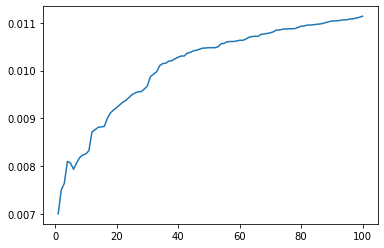

In [164]:
x = [i for i in range(1, 101)]
y1 = mapk_vals_np
plt.plot(x,y1)
plt.show()

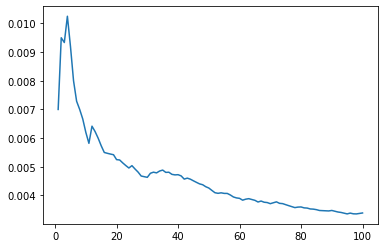

In [165]:
y2 = avg_precision_vals_np
plt.plot(x,y2)
plt.show()

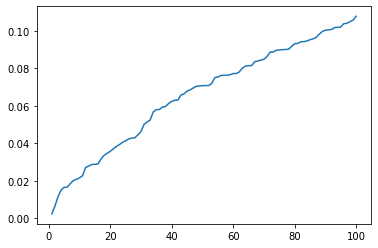

In [166]:
y3 = avg_recall_vals_np
plt.plot(x,y3)
plt.show()

#### Evaluating Content-Based Recommendations

#### WIth new Customers

k=20

In [81]:
k=20
cust_ids = list(test_df['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [82]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']


In [83]:
content_based_recommendations

,customer_id,recommended_article_id
0,009036de9af83a9007908591e2c6e551860e0474e5b823...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,00ae9aa00317595e62a0f782228d3a98e017d071d03049...,"[189626001, 189654001, 189654045, 189654046, 1..."
2,00c7b0d0958cdaba2aa31ff2b02e4b7fff952e823fad23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,00d77f043a22a161d8e2f7f0b0e5684290948c76c34b27...,"[118458003, 118458004, 118458028, 118458029, 6..."
4,01509b6433e843523eaecd8edc6f41fa962b314b1bd291...,"[695632001, 695632002, 695632003, 695632004, 5..."
...,...,...
995,ff07b1bca62eedab9778fffd7494a6e17dff218425a65a...,"[638899002, 111586001, 120129001, 120129014, 1..."
996,ff0bc7d7b5b4434c3d1230709650aa67c64f4b3c161492...,"[111586001, 120129001, 120129014, 120129018, 1..."
997,ff7313f354e805f6ace690ddaa753d302341dd810a4a59...,"[652731001, 652731003, 652731006, 652731007, 6..."
998,ffc197751ef56add717e78d7611d409b94c37d1f7aa900...,"[507909001, 507909002, 507909003, 507909006, 5..."


In [80]:
test_df

,customer_id,article_id
0,001ddeb8fb74fec5693116da83b488e05ee9a9e179f3fd...,706016002 876148002 843777005 812271001
1,00606f86a995447df68f65e3e05e97f63cb5d1a6d27daa...,908380001
2,00b338d3ce835eac6af72813ceb5523a76f770c7386746...,921380001 934727002 909588003 913033002 897189...
3,00b5b1e77a0af80ed6f8aa472b03125059ef0e9cf8920e...,863583001
4,00de181f0286552866ff63d431c244308f3484bad2f5be...,929511001
...,...,...
995,fe2b0c56194dd3d5b038a7672440c0f2787d167857c45c...,929275001 810557001 827500004 885951001 929275...
996,fe51d8f37b9010f5b29796f716963afeba1326f3c6bdc2...,923569002 934212003 905945002 906794004 902528...
997,ff82577e1128ac54c42fd33686e32cbf1907403d98cf2a...,916926005 573085028 573085057 573085057 863646...
998,ff92975688a62c6bead4091dc401b38ff9bb31889db34d...,874891002 874891002 874891003 874891003


In [85]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,009036de9af83a9007908591e2c6e551860e0474e5b823...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",909914001 915529003 866731001 879291001
1,00ae9aa00317595e62a0f782228d3a98e017d071d03049...,"[189626001, 189654001, 189654045, 189654046, 1...",808648001 808648001
2,00c7b0d0958cdaba2aa31ff2b02e4b7fff952e823fad23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",921671001
3,00d77f043a22a161d8e2f7f0b0e5684290948c76c34b27...,"[118458003, 118458004, 118458028, 118458029, 6...",901433001
4,01509b6433e843523eaecd8edc6f41fa962b314b1bd291...,"[695632001, 695632002, 695632003, 695632004, 5...",673677026
...,...,...,...
995,ff07b1bca62eedab9778fffd7494a6e17dff218425a65a...,"[638899002, 111586001, 120129001, 120129014, 1...",806241009 762600009
996,ff0bc7d7b5b4434c3d1230709650aa67c64f4b3c161492...,"[111586001, 120129001, 120129014, 120129018, 1...",766346003 915529003
997,ff7313f354e805f6ace690ddaa753d302341dd810a4a59...,"[652731001, 652731003, 652731006, 652731007, 6...",904671001 903359001 886566001 914805002 857030...
998,ffc197751ef56add717e78d7611d409b94c37d1f7aa900...,"[507909001, 507909002, 507909003, 507909006, 5...",700429002


In [86]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [87]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [88]:
map_cb = mapk(actual, predicted, 50)
map_cb

0.002021908939014202

In [89]:
p_score = avg_precision(actual, predicted)
p_score

0.0004999999999999999

In [90]:
r_score = avg_recall(actual, predicted)
r_score

0.004416666666666667

k=10

In [81]:
k=10
cust_ids = list(test_df['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [82]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [83]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,001ddeb8fb74fec5693116da83b488e05ee9a9e179f3fd...,"[682965002, 110065001, 539197001, 539197012, 5...",706016002 876148002 843777005 812271001
1,00606f86a995447df68f65e3e05e97f63cb5d1a6d27daa...,"[636587001, 636587003, 557248001, 557248002, 6...",908380001
2,00b338d3ce835eac6af72813ceb5523a76f770c7386746...,"[675142001, 112679048, 108775015, 108775051, 6...",921380001 934727002 909588003 913033002 897189...
3,00b5b1e77a0af80ed6f8aa472b03125059ef0e9cf8920e...,"[522346001, 522346006, 661162001, 661162002, 5...",863583001
4,00de181f0286552866ff63d431c244308f3484bad2f5be...,"[465572001, 494935004, 614848001, 614848005, 4...",929511001
...,...,...,...
995,fe2b0c56194dd3d5b038a7672440c0f2787d167857c45c...,"[282832001, 282832012, 241590001, 241602003, 3...",929275001 810557001 827500004 885951001 929275...
996,fe51d8f37b9010f5b29796f716963afeba1326f3c6bdc2...,"[118458003, 118458004, 914966001, 404609007, 1...",923569002 934212003 905945002 906794004 902528...
997,ff82577e1128ac54c42fd33686e32cbf1907403d98cf2a...,"[118458003, 118458004, 578433003, 578433006, 6...",916926005 573085028 573085057 573085057 863646...
998,ff92975688a62c6bead4091dc401b38ff9bb31889db34d...,"[316441001, 316441006, 633377001, 633377002, 6...",874891002 874891002 874891003 874891003


In [84]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [85]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [86]:
map_cb = mapk(actual, predicted, k)
map_cb

0.0005714285714285714

In [87]:
p_score = avg_precision(actual, predicted)
p_score

0.00030000000000000003

In [88]:
r_score = avg_recall(actual, predicted)
r_score

0.0016111111111111111

k=50

In [85]:
k=50
cust_ids = list(test_df['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [86]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [87]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,00d50aaf75f46e2975bd23a9283d098b34a087e9281255...,"[708352001, 708352002, 708352003, 708352004, 1...",754362020 572998013
1,00e80d504a6043b8b588f118b9bf97d73daeed6d3f68b1...,"[673677001, 673677002, 673677004, 673677005, 6...",785018003 821152002
2,00f0157f63bfd27503a760c86b610d9e3ea63e67351aa0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",456163086 715624001 456163085
3,00fb1d75af5bdbea71936c004adaef008c5dd8820c8353...,"[803990002, 192460006, 202017055, 212629004, 2...",909371001 877961005 877961006 807244017
4,012b7cc3c5080e46dac622a12e99d23510a4d67a4037d1...,"[282832001, 282832012, 282832014, 282832015, 2...",923340001 923340001
...,...,...,...
995,fe8f97e64a752766fff7d9517e70c09d0e32a8a029ea5b...,"[549251003, 549251004, 549251005, 549251012, 5...",935840001
996,fe9399f3273bc90d2f571b6a2e7f3b0f8876736a93c550...,"[399256002, 399256003, 399256005, 399256009, 3...",874826001 738713029 783346016 865917002 716670...
997,ffa4cff2802e80ea99a47655ae784c93560f72ca16b6ac...,"[211143021, 211143022, 211143023, 211143036, 2...",873679001
998,ffa5a7175bc5200c22de5080edc254c81729114e200dd4...,"[585503001, 585503002, 585503003, 585503005, 1...",570003001


In [88]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [89]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [98]:
k=50

In [101]:
map_cb = mapk(actual, predicted, k)
map_cb

0.0007532737231394373

In [102]:
p_score = avg_precision(actual, predicted)
p_score

0.00030000000000000003

In [103]:
r_score = avg_recall(actual, predicted)
r_score

0.005059523809523811

k=100

In [104]:
k=100
cust_ids = list(test_df['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [105]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [106]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df, on='customer_id')

In [107]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [108]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [109]:
map_cb = mapk(actual, predicted, 100)
map_cb

0.0011760568943664333

In [110]:
p_score = avg_precision(actual, predicted)
p_score

0.00030000000000000003

In [111]:
r_score = avg_recall(actual, predicted)
r_score

0.008692099567099569

#### Without new customers

k=20

In [115]:
k=20
cust_ids = list(test_df_without_new_cust['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [116]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [117]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df_without_new_cust, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,0040e2fc2d1e7931a38355aca56b2c62b87e65051b7287...,"[277738002, 277738011, 277738012, 319811019, 5...",799365001 799365028 863646004
1,004a44473a84b8809a136aac040eae2e567f85031949eb...,"[235596002, 292453003, 292453009, 292453011, 6...",918292003 849487001
2,007ce0bc11eeab9b58cb2ab04715c6a5c478828aa3b7a7...,"[743616002, 743616009, 118458003, 118458004, 1...",925666003 893133001 918894002 456163083 802023...
3,00c0875075599d2b44846b94f2368b174448dfd50fd178...,"[632143002, 189626001, 189654001, 189654045, 6...",715624001 677930086
4,0114b9ec6bcf634a60b7c259101f706cc3c3ba8cd6891f...,"[663007001, 663007004, 663007006, 663007007, 5...",916415002 897423002
...,...,...,...
995,fed66fd2a9c2f7af755813db23e7fdce433c9706960b2b...,"[634744003, 634744005, 634744009, 634744010, 6...",870328002 759482001 873279005
996,fee8b241153e748c206d808f567d9fa9d31843f2d73db0...,"[118458003, 118458004, 118458028, 118458029, 1...",673677024 673677004 673677002 906794003 906794...
997,ff59469d169167c83a5cb4643892c41351b8d181b33136...,"[554598001, 554598002, 554598004, 554598007, 5...",889550001
998,ff92975688a62c6bead4091dc401b38ff9bb31889db34d...,"[316441001, 316441006, 316441008, 316441011, 6...",874891002 874891002 874891003 874891003


In [118]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [119]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [120]:
map_cb = mapk(actual, predicted, 50)
map_cb

0.0018345451418206836

In [121]:
p_score = avg_precision(actual, predicted)
p_score

0.0006

In [122]:
r_score = avg_recall(actual, predicted)
r_score

0.0057

k=10

In [89]:
k=10
cust_ids = list(test_df_without_new_cust['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [90]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [91]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df_without_new_cust, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,00b2e2bdedcd55e1509bcd3bdd69b4167fabee49e6bb29...,"[507910001, 507910002, 693387003, 404609007, 5...",706016015
1,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,"[589748004, 589748005, 630116002, 630116003, 6...",892309003 892309003 757971001 757971001 757971...
2,00e715cbf3cbc3ec5c2c6a2a6ba26bd4e6b4f6930208b3...,"[241436001, 241436006, 118458003, 118458004, 6...",375917006
3,00fa33158eb59432984490a9c7bac5897496e841cca799...,"[607154006, 607154007, 637268001, 637268006, 6...",932243001 914441005 882900004 732842014 749699...
4,0104bee289e6af328d9c2502f1808e230623c4587e0ddc...,"[674606001, 674606002, 904424001, 176209023, 6...",893820001 923758001 946095001 834924005 865929...
...,...,...,...
995,ff0127319ea7e48c5f9d8afc0deb61395273d9f743db9e...,"[494030010, 494030013, 118458003, 118458004, 1...",886390001 554598083
996,ff0cc5d86cd1c7751ae443e8357b9d23681d2c5f67919f...,"[426019008, 445865001, 705799001, 705799003, 7...",879166004 879166004
997,ff335bffc52a0462f8ab27fb51fc11f27333a86a320b84...,"[624562001, 624562002, 608007001, 608007002, 1...",764073002
998,ff49f903b3a7105d373c80b019a5dc169e37a16e55cbe1...,"[235596002, 292453003, 692155001, 692155003, 5...",861565001 861565001 869706001 878183003 891591...


In [92]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [93]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [94]:
map_cb = mapk(actual, predicted, 50)
map_cb

0.00038452380952380954

In [95]:
p_score = avg_precision(actual, predicted)
p_score

0.0007

In [98]:
r_score = avg_recall(actual, predicted)
r_score

0.002725

k=50

In [112]:
k=50
cust_ids = list(test_df_without_new_cust['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [113]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [114]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df_without_new_cust, on='customer_id')

In [115]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [116]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [117]:
map_cb = mapk(actual, predicted, 50)
map_cb

0.00035100128173780294

In [118]:
p_score = avg_precision(actual, predicted)
p_score

0.00019999999999999998

In [119]:
r_score = avg_recall(actual, predicted)
r_score

0.0042833333333333334

k=100

In [167]:
k=100
cust_ids = list(test_df_without_new_cust['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [168]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [169]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df_without_new_cust, on='customer_id')

In [170]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [171]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [172]:
map_cb = mapk(actual, predicted, 100)
map_cb

0.001020272883573806

In [173]:
p_score = avg_precision(actual, predicted)
p_score

0.00025

In [174]:
r_score = avg_recall(actual, predicted)
r_score

0.007908333333333333

#### Evaluating Content-based recommendations from k=1 to k=100

In [175]:
def content_based_multiple_recommendations(n, data, test_df, articles_product_code_df, articles_product_type_df):
    mapk_list=[]
    avg_precision_list=[]
    avg_recall_list=[]
    for k in range (1, 101):
        cust_ids = list(test_df['customer_id'])
        content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

        customer_ids = []
        recommended_article_ids = []
        for rec in content_based_recs:
            customer_ids.append(rec)
            recommended_article_ids.append(content_based_recs[rec])
        content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
        content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

        actual_predicted_df = pd.merge(content_based_recommendations, test_df_without_new_cust, on='customer_id')

        #Creating list of predicted items
        predicted_list = actual_predicted_df['recommended_article_id'].to_list()
        predicted = []
        for p in predicted_list:
            p_int=[int(value) for value in p]
            predicted.append(p_int)
        
        #Creating list of actual items bought by the user
        articles_list = test_df['article_id'].to_list()
        actual = []
        for a in articles_list:
            arr=a[:-1].split(' ')
            arr=[int(value) for value in arr]
            actual.append(arr)

        
        mapk_list.append(mapk(a_list, p_list, k))
        avg_precision_list.append(avg_precision(a_list, p_list))
        avg_recall_list.append(avg_recall(a_list, p_list))

    return mapk_list, avg_precision_list, avg_recall_list
        


In [176]:
mapk_vals_cb, avg_precision_vals_cb, avg_recall_vals_cb = content_based_multiple_recommendations(7, train, test_df, articles_product_code_df, articles_product_type_df)

### Evaluating ALS

#### With new Customers

k=20

In [92]:
k=20
cust_list = list(set(new_test_data['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [95]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [47]:
new_test_data_without_new_cust

,t_dat,customer_id,article_id,price,sales_channel_id
31548106,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,892309003,0.016932,2
31548107,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,892309003,0.016932,2
31548108,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,757971001,0.022017,2
31548109,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,757971001,0.022017,2
31548110,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,757971001,0.022017,2
...,...,...,...,...,...
31787865,2020-09-22,fc05d856455dfccf1e2ffb91fcef92b4c037a86d1a0f7a...,893432002,0.033881,2
31787879,2020-09-22,fc402eb5260f910db839608890dd7f2b56645e6d43f5a6...,936622001,0.025407,2
31787880,2020-09-22,fc402eb5260f910db839608890dd7f2b56645e6d43f5a6...,909869001,0.025407,2
31787982,2020-09-22,fd317c749b129fcdb482423c8269d19c161a719c8045e3...,828268003,0.040661,2


In [97]:
actual_predicted_df = pd.merge(als_recommendations_df, new_test_data, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,e9ed8cba67c9057f8ede3a0f71183583fa9ec6cb80a7be...,"[678942001, 579541001, 664074001, 673396002, 3...",826508007 905660002
1,81b0b53022e029935313f340f78e85285b89b274d9ab05...,"[759871003, 759871004, 733749001, 559630026, 5...",372860001 914441004
2,a1161a62a6e20360e48d109c52d08442218fdf13652527...,"[685816001, 685816002, 685813001, 685814001, 7...",739590041
3,33b8a520ca3e9a9eda9f63155ee628ab71949f626bf0fe...,"[741356002, 720125001, 717490008, 554479001, 8...",932243002 933989001 923134002 921671001 922048...
4,29d4db756dbe47d53cf3fb088dc09745d45333ca068ed3...,"[507909001, 610776001, 695632002, 772005009, 5...",909912001 856270003 909911001 918292011
...,...,...,...
995,43830264a98188a81c5331186eb7e1bfbb56cc013be510...,"[351484002, 723529001, 699080001, 599580038, 5...",918890002 907188003
996,c298e6213dfb1d74e74b917a184ccac4de7be9ba216172...,"[749699002, 749699001, 716672001, 678942001, 6...",902802005 902802002
997,51b2f31743b8660474a1897ce89160eba3105db39d8f31...,"[676827002, 680187001, 631848002, 671505001, 6...",895376004 906097002 918240001
998,dfda51d629ba862c61c3db2e60933790aad0112766bcaa...,"[562245001, 706016015, 706016006, 562245018, 5...",819547001 846353001


In [98]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [100]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [101]:
map_als = mapk(actual, predicted, 50)
map_als

0.0031008126953803645

In [102]:
p_score = avg_precision(actual, predicted)
p_score

0.0018500000000000012

In [103]:
r_score = avg_recall(actual, predicted)
r_score

0.012257685969001755

k=10

In [42]:
k=10
cust_list = list(set(new_test_data['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [43]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [47]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,4a2fa5b2795cc3f468c75d7e8e274ad11c1cdb442de7bc...,"[565379001, 355072002, 565379002, 741356002, 7...",804992002 720125041 720125042
1,c6eaf4563990da7f6bd1d243f59188aa96f99b3d530f2e...,"[684209013, 684209027, 688537021, 757896001, 6...",934835001 912574002 911034001 912574003
2,ffa5a7175bc5200c22de5080edc254c81729114e200dd4...,"[484398001, 720125001, 573716012, 539723005, 3...",570003001
3,dc0b497b65633e1116b0e7bfc25de26d1e2df5cf59f44e...,"[778064001, 673677002, 678942001, 579541001, 8...",774113006 903487001 903487001 266875006 918765...
4,b210f8ce12324d791cb10a1a824c44bc20969da1935eb9...,"[759871001, 228257001, 706016015, 706016006, 4...",923758001 927865001
...,...,...,...
995,a8e060a55d2a63a0444659371b9d25094499dd13f64098...,"[598859003, 501323011, 688873012, 505221001, 6...",903824006 456163060
996,bd3c3bdd30fb0104a926b675b5889d9e56a7de1d9b6953...,"[598859003, 501323011, 688873012, 505221001, 6...",872387002 915529005 825585002 797988001 797988...
997,588b16f2d9b34b4787a5b8ace215d05264e784f6b01666...,"[751471001, 673677002, 783346001, 573716012, 4...",716670009
998,9075576138d35973d3842d15b9a9383affd0661e9054b7...,"[598859003, 501323011, 688873012, 505221001, 6...",805000001


In [45]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [48]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [49]:
map_als = mapk(actual, predicted, 50)
map_als

0.0007564529914529913

In [50]:
p_score = avg_precision(actual, predicted)
p_score

0.0012

In [51]:
r_score = avg_recall(actual, predicted)
r_score

0.0025769230769230765

k=50

In [127]:
k=50
cust_list = list(set(new_test_data['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [128]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [129]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,4a2fa5b2795cc3f468c75d7e8e274ad11c1cdb442de7bc...,"[565379001, 355072002, 565379002, 741356002, 7...",804992002 720125041 720125042
1,c6eaf4563990da7f6bd1d243f59188aa96f99b3d530f2e...,"[684209013, 684209027, 688537021, 757896001, 6...",934835001 912574002 911034001 912574003
2,ffa5a7175bc5200c22de5080edc254c81729114e200dd4...,"[484398001, 720125001, 573716012, 539723005, 3...",570003001
3,dc0b497b65633e1116b0e7bfc25de26d1e2df5cf59f44e...,"[778064001, 673677002, 678942001, 579541001, 8...",774113006 903487001 903487001 266875006 918765...
4,b210f8ce12324d791cb10a1a824c44bc20969da1935eb9...,"[759871001, 228257001, 706016015, 706016006, 4...",923758001 927865001
...,...,...,...
995,a8e060a55d2a63a0444659371b9d25094499dd13f64098...,"[567594001, 567475001, 427114015, 648719001, 6...",903824006 456163060
996,bd3c3bdd30fb0104a926b675b5889d9e56a7de1d9b6953...,"[567594001, 567475001, 427114015, 648719001, 6...",872387002 915529005 825585002 797988001 797988...
997,588b16f2d9b34b4787a5b8ace215d05264e784f6b01666...,"[751471001, 673677002, 783346001, 573716012, 4...",716670009
998,9075576138d35973d3842d15b9a9383affd0661e9054b7...,"[567594001, 567475001, 427114015, 648719001, 6...",805000001


In [130]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [131]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [132]:
map_als = mapk(actual, predicted, 50)
map_als

0.003901472333667193

In [133]:
p_score = avg_precision(actual, predicted)
p_score

0.0013800000000000008

In [134]:
r_score = avg_recall(actual, predicted)
r_score

0.020926554621848732

k=100

In [135]:
k=100
cust_list = list(set(new_test_data['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [136]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [137]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df, on='customer_id')

In [138]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [139]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [140]:
map_als = mapk(actual, predicted, 50)
map_als

0.0039095368497962255

In [141]:
p_score = avg_precision(actual, predicted)
p_score

0.0010500000000000008

In [142]:
r_score = avg_recall(actual, predicted)
r_score

0.03251287496816908

#### Without new customers

k=20

In [33]:
k=20
cust_list = list(set(test_df_without_new_cust['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [34]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [45]:
als_recommendations_df

,customer_id,recommended_article_id
0,792f8ce728f5bc4b69e726345cba6c3036ce88b9b497c2...,"[711053003, 673677002, 579541001, 751471001, 8..."
1,0d44117d5f5a3092245c1f740b1fa5601860a9ebb1d4fb...,"[565379001, 689109003, 692930003, 684341002, 6..."
2,1c9a126a58d3e8102cb1ca50ef51871a8cf4455df9a51a...,"[372860002, 156231001, 572797002, 610776001, 8..."
3,f39b6301807b7f8f486d96f6ef60614e8eecb139bdbbd4...,"[749699002, 716672001, 706016003, 783346001, 7..."
4,92c88879302d4f46cc0ec2c74b92741311e4f310c01d90...,"[610776001, 562245018, 562245046, 565379001, 5..."
...,...,...
995,51891a6359009a86681b132e72afa833be593b49220e31...,"[507909001, 507910001, 568601006, 579541001, 6..."
996,260f462941459804fce77ed764a4b50764c5463d4b4fe6...,"[156231001, 759871002, 673677002, 685816002, 2..."
997,f0a8d7f9e01f8ca3ee78e5e7cd3d164136455d096fe698...,"[673396002, 749699002, 610776001, 762846001, 7..."
998,07b00f3278dd6dffd6280dadd6372a478c6eb7fbec431b...,"[806388001, 806388003, 372860002, 564786001, 7..."


In [48]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df_without_new_cust, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,792f8ce728f5bc4b69e726345cba6c3036ce88b9b497c2...,"[711053003, 673677002, 579541001, 751471001, 8...",803757015 594987024
1,0d44117d5f5a3092245c1f740b1fa5601860a9ebb1d4fb...,"[565379001, 689109003, 692930003, 684341002, 6...",711053003 598755001 598755002
2,1c9a126a58d3e8102cb1ca50ef51871a8cf4455df9a51a...,"[372860002, 156231001, 572797002, 610776001, 8...",873279001 873279005
3,f39b6301807b7f8f486d96f6ef60614e8eecb139bdbbd4...,"[749699002, 716672001, 706016003, 783346001, 7...",917919002 850917006
4,92c88879302d4f46cc0ec2c74b92741311e4f310c01d90...,"[610776001, 562245018, 562245046, 565379001, 5...",936610001 919499010
...,...,...,...
995,51891a6359009a86681b132e72afa833be593b49220e31...,"[507909001, 507910001, 568601006, 579541001, 6...",894768001 894768001
996,260f462941459804fce77ed764a4b50764c5463d4b4fe6...,"[156231001, 759871002, 673677002, 685816002, 2...",825580001
997,f0a8d7f9e01f8ca3ee78e5e7cd3d164136455d096fe698...,"[673396002, 749699002, 610776001, 762846001, 7...",851094008 892983001 868823008 804992016 851094...
998,07b00f3278dd6dffd6280dadd6372a478c6eb7fbec431b...,"[806388001, 806388003, 372860002, 564786001, 7...",915526002


In [49]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [51]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [52]:
map_als = mapk(actual, predicted, 50)
map_als

0.0045476465749212484

In [53]:
p_score = avg_precision(actual, predicted)
p_score

0.0023500000000000005

In [54]:
r_score = avg_recall(actual, predicted)
r_score

0.015030387317025244

k=10

In [52]:
k=10
cust_list = list(set(test_df_without_new_cust['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [53]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [54]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df_without_new_cust, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,f18eb9c5ae3301e4baeac7d5df009711caeffef4a962a5...,"[673396002, 806388002, 685816001, 156231001, 6...",896152001
1,4b71eab59fe2804f40207d9fa66ea903bc35ce4764f2ba...,"[507909001, 568601006, 673396002, 695632002, 6...",888700002 785018003 785018003
2,376f69dfec0114d633cc22cff5a5d3be9e58fe7ddbc306...,"[448509014, 758064001, 758060001, 160442007, 1...",851546003
3,2ae93e13f0e94a9e08d72abd365c49f8bd16f042a071b5...,"[399223029, 399223033, 562245001, 160442007, 5...",806388018 865799006 706016001
4,48811e5a747119cff4e5f6ca8335381fce15a275152261...,"[711053003, 720125001, 751471001, 590928001, 5...",915292001 866731001
...,...,...,...
995,fc1dc29d8662415a175c7ff0314529fb134d4f2a75a71c...,"[600886001, 717490008, 554479001, 753737001, 6...",866528001 902400001 904230003
996,0e9b018448b2914d884e3ec4d4c099655da4de5c97c8a4...,"[706016006, 706016015, 562245050, 610776001, 3...",885077001 914449001 916336001 893820001
997,3b5fdc79a973ad1de76675e2906d8943cfbc5db51e34fc...,"[678942001, 673677004, 579541001, 591334003, 3...",910601001
998,67d8ed4c29e184d4ecec1223a53134881df5a0dfe23017...,"[399087014, 399223029, 658030011, 658030001, 3...",916881001 810172018 939845001


In [55]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [56]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [57]:
map_als = mapk(actual, predicted, 50)
map_als

0.0032306305114638448

In [58]:
p_score = avg_precision(actual, predicted)
p_score

0.002600000000000001

In [59]:
r_score = avg_recall(actual, predicted)
r_score

0.008509523809523809

k=50

In [143]:
k=50
cust_list = list(set(test_df_without_new_cust['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [144]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [145]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df_without_new_cust, on='customer_id')

In [146]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [147]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [148]:
map_als = mapk(actual, predicted, 50)
map_als

0.0037481654168786396

In [149]:
p_score = avg_precision(actual, predicted)
p_score

0.0012600000000000007

In [150]:
r_score = avg_recall(actual, predicted)
r_score

0.018135090702947842

k=100

In [151]:
k=100
cust_list = list(set(test_df_without_new_cust['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [152]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [153]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df_without_new_cust, on='customer_id')

In [154]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [155]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [156]:
map_als = mapk(actual, predicted, 50)
map_als

0.0037481654168786396

In [157]:
p_score = avg_precision(actual, predicted)
p_score

0.0009600000000000007

In [158]:
r_score = avg_recall(actual, predicted)
r_score

0.02723149429935143